In [234]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme('notebook', 'whitegrid', 'Set1')

In [3]:
data = pd.read_csv('data/Crimes/Base_Crimes_Geral_2006_2017 - Marcelo/crimes_2006_2017_corrigido.csv', sep='\t', index_col="Unnamed: 0")

In [4]:
data["DATA_BO"] = pd.to_datetime(data["DATA_OCORRENCIA_BO"] + ' ' + data["HORA_OCORRENCIA_BO"])
data = data.drop(columns=["DATA_OCORRENCIA_BO", "HORA_OCORRENCIA_BO", "ANO_OCORR"])

In [123]:
times = dict()

for setor in data["COD_SETOR"].unique():
    dtime = []
    df = data.loc[data['COD_SETOR'] == setor, "DATA_BO"].sort_values(ignore_index=True)

    for i in range(1, len(df)):
        dtime.append((df[i] - df[i-1]).days)

    times[setor] = dtime

In [185]:
setores.shape

(13501,)

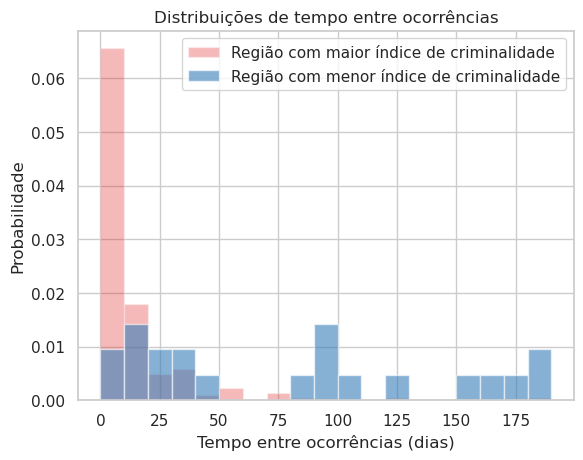

In [255]:
import scipy.stats as st

setores = np.argsort([-len(lista) for lista in times.values()])
plt.title('Distribuições de tempo entre ocorrências')
plt.hist(times[list(times.keys())[setores[13]]], bins=np.arange(0, 200, step=10), density=True, alpha=0.3, label="Região com maior índice de criminalidade")
plt.hist(times[list(times.keys())[setores[900]]], bins=np.arange(0, 200, step=10), density=True, alpha=0.6, label="Região com menor índice de criminalidade")
plt.xlabel("Tempo entre ocorrências (dias)")
plt.ylabel("Probabilidade")
plt.legend()
plt.savefig('plots/tempo.svg')
plt.show()